# Home assignment - FCQ
## Author: Kevin Cattaneo - S4944382

|\beta_{00}\rangle = \frac{|00\rangle +|11\rangle}{\sqrt{2}}

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")
    
import matplotlib.pyplot as plt

In [ ]:
# Print function
def myprint(simulator, circuit):
  print('-- Circuit simulation --')
  results= simulator.simulate(circuit)
  print(results)
  print('\n\n')
  print(circuit)
  print('\n')

In [ ]:
### Note: we will recreate two new qubits every time, but only to simulate the different choices that Alice can take 
# We will generate the Bell State:
# sqrt(2) * ( |00> + |11> )
# This will be the entangled state shared between Alice and Bob
def bell_creation():
  bell_circuit = cirq.Circuit()
  a, b = cirq.LineQubit.range(2)
  bell_circuit.append(cirq.H(a))
  bell_circuit.append(cirq.CNOT(a,b))
  return a, b, bell_circuit # returns two qubits (of Alice and Bob) and the circuit

In [ ]:
# Verification of result with a measure, plus printing a histogram

def measureAndHist(simulator, a, b, circuit):
  # For sampling, we need to add a measurement at the end
  circuit.append(cirq.measure(a, b, key='result'))

  # Sample the circuit
  samples = simulator.run(circuit, repetitions=1000) # verify for n repetition the result

  # Pull of histogram counts from the result data structure
  counts = samples.histogram(key='result')
  print(counts)

  # Graph the histogram counts instead of the results
  cirq.plot_state_histogram(counts, plt.subplot())
  plt.show()

In [ ]:
# Initialize Simulator
s = cirq.Simulator()

### If Alice wants to send string 00...

In [ ]:
# If Alice wants to send string 00...
# no further operations on circuit (identity)
print('-- Alice sends 00 -- ')
a, b, bell_circuit = bell_creation()
myprint(s, bell_circuit)

-- Alice sends 00 -- 
-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩



0: ───H───@───
          │
1: ───────X───




#### Bob receives the entangled state and try to obtain the original string (that should be 00)

-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: |00⟩

phase:
output vector: |⟩



0: ───H───@───@───H───
          │   │
1: ───────X───X───────


Counter({0: 1000})


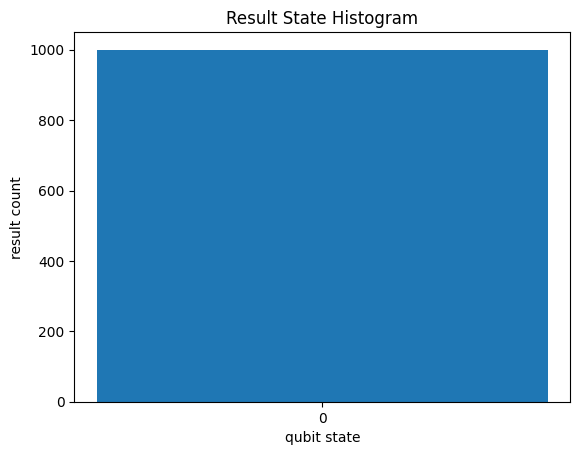

In [ ]:
# Bob applies CNOT gate and Hadamard gate on the first qubit in sequence
bell_circuit.append(cirq.CNOT(a,b))
bell_circuit.append(cirq.H(a))
myprint(s, bell_circuit) # Bob obtain |00> with the 100% of probability
measureAndHist(s, a, b, bell_circuit)

### If Alice wants to send string 01...

In [ ]:
# If Alice wants to send string 01...
print('-- Alice sends 01 -- ')
a, b, bell_circuit = bell_creation()
bell_circuit.append(cirq.X(a))
myprint(s, bell_circuit)

-- Alice sends 01 -- 
-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|01⟩ + 0.707|10⟩

phase:
output vector: |⟩



0: ───H───@───X───
          │
1: ───────X───────




#### Bob receives the entangled state and try to obtain the original string (that should be 01)

-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: |01⟩

phase:
output vector: |⟩



0: ───H───@───X───@───H───
          │       │
1: ───────X───────X───────


Counter({1: 1000})


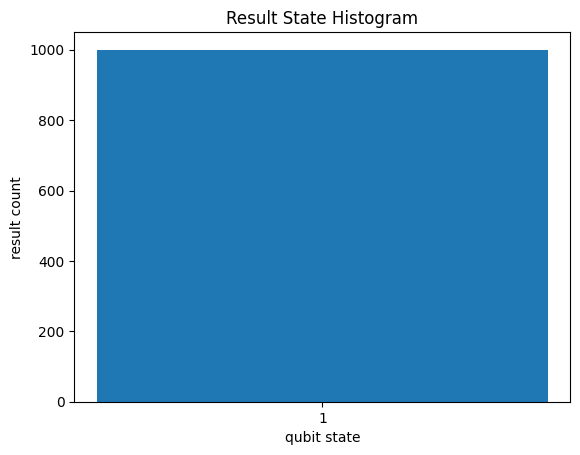

In [ ]:
# Bob applies CNOT gate and Hadamard gate on the first qubit in sequence
bell_circuit.append(cirq.CNOT(a,b))
bell_circuit.append(cirq.H(a))
myprint(s, bell_circuit) # Bob obtains |01> with the 100% of probability
measureAndHist(s, a, b, bell_circuit)

### If Alice wants to send string 10...

In [ ]:
# If Alice wants to send string 10...
print('-- Alice sends 10 -- ')
a, b, bell_circuit = bell_creation()
bell_circuit.append(cirq.Z(a))
myprint(s, bell_circuit) # global phase

-- Alice sends 10 -- 
-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ - 0.707|11⟩

phase:
output vector: |⟩



0: ───H───@───Z───
          │
1: ───────X───────




#### Bob receives the entangled state and try to obtain the original string (that should be 10)

-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: |10⟩

phase:
output vector: |⟩



0: ───H───@───Z───@───H───
          │       │
1: ───────X───────X───────


Counter({2: 1000})


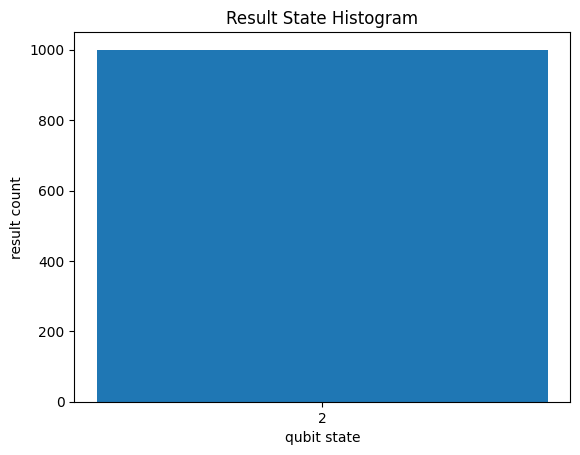

In [ ]:
# Bob applies CNOT gate and Hadamard gate on the first qubit in sequence
bell_circuit.append(cirq.CNOT(a,b))
bell_circuit.append(cirq.H(a))
myprint(s, bell_circuit) # Bob obtains |10> with the 100% of probability
measureAndHist(s, a, b, bell_circuit)

### If Alice wants to send string 11...

In [ ]:
# If Alice wants to send string 11...
print('-- Alice sends 11 -- ')
a, b, bell_circuit = bell_creation()
bell_circuit.append(cirq.Z(a))
bell_circuit.append(cirq.X(a))
myprint(s, bell_circuit) # global phase

-- Alice sends 11 -- 
-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: -0.707|01⟩ + 0.707|10⟩

phase:
output vector: |⟩



0: ───H───@───Z───X───
          │
1: ───────X───────────




#### Bob receives the entangled state and try to obtain the original string (that should be 11)

-- Circuit simulation --
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: -1|11⟩

phase:
output vector: |⟩



0: ───H───@───Z───X───@───H───
          │           │
1: ───────X───────────X───────


Counter({3: 1000})


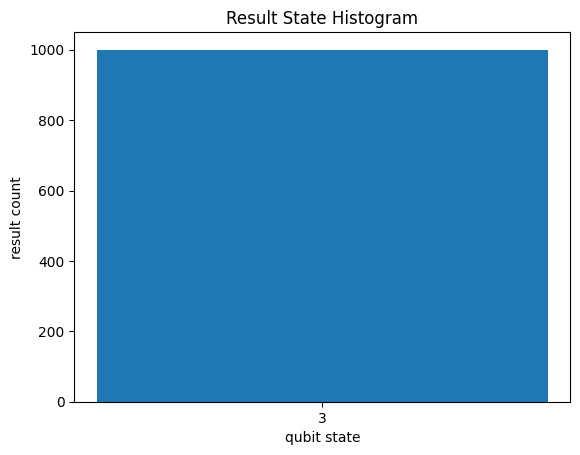

In [ ]:
# Bob applies CNOT gate and Hadamard gate on the first qubit in sequence
bell_circuit.append(cirq.CNOT(a,b))
bell_circuit.append(cirq.H(a))
myprint(s, bell_circuit) # Bob obtains |11> with the 100% of probability, ignoring global phase
measureAndHist(s, a, b, bell_circuit)